In [1]:
from model import taxiway_model

from fmdtools.analyze import plot as plot
from fmdtools.sim import propagate as prop
import networkx as nx
from common import plot_tstep, plot_course

In [2]:
import pandas as pd

## Taxiway Model Overview

The taxiway model has three main agents:
- Helicopter, which lands and takes off from a helipad
- Aircraft, which lands at a runway, taxis to a gate, and takes off from a runway (and may be UAVs or Piloted Aircraft)
- ATC, which coordinates operations

These agents interact via the flows:
- Ground, a MultiFlow tracking the map as well as agent assignments/allocations
- Location, a MultiFlow tracking the position/velocity of each route on the map, and
- Requests, a CommsFlow tracking the messages sent between the ATC and the Aircraft/Helicopters

In [3]:
from fmdtools.analyze.graph import ModelTypeGraph

In [4]:
mdl = taxiway_model()

In [5]:
tg = ModelTypeGraph(mdl)

In [6]:
tg.set_edge_labels(title='')

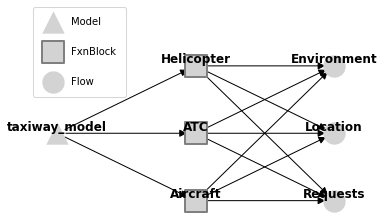

In [7]:
fig, ax = tg.draw(figsize=(6,3), withlegend=True, legend_bbox=(0, 1))

In [8]:
fig.savefig("modelstructure.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [9]:
mdl.flows['location']

location Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   ma1 Location flow: LocationState(x=10.0, y=20.0, xd=0.0, yd=0.0, speed=0.0, stage='takeoff', mode='standby')
   percieved Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   closest Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   ma2 Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   percieved Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   closest Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   ma3 Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   percieved Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stag

In [10]:
mdl.flows['requests']

requests Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
   atc: atc Requests flow: RequestState(atc_com='None', asset_req='land', route='           ')
       out: atc_out Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       in: {}
       received: {}
       h1: h1 Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       h2: h2 Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       ua1: ua1 Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       ua2: ua2 Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       ua3: ua3 Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       ma1: ma1 Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       ma2: ma2 Requests flow: RequestState(atc_com='None', asset_req='None', route=' 

In [11]:
mdl.flows['ground']

ground Environment flow: TaxiwayStates(area_allocation={'takeoff1': {'ma1'}, 'landing1': set(), 'helipad1': {'h1'}, 'gate1': set(), 'gate2': set(), 'gate3': set(), 'gate4': set(), 'gate5': set(), 'gate6': {'ua1'}, 'air_loc': set()}, asset_area={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'gate6', 'ua2': 'air_loc', 'ua3': 'air_loc', 'ma1': 'takeoff1', 'ma2': 'air_loc', 'ma3': 'air_loc'}, asset_assignment={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'gate6', 'ua2': 'air_loc', 'ua3': 'air_loc', 'ma1': 'takeoff1', 'ma2': 'air_loc', 'ma3': 'air_loc'})
   atc Environment flow: TaxiwayStates(area_allocation={'takeoff1': {'ma1'}, 'landing1': set(), 'helipad1': {'h1'}, 'gate1': set(), 'gate2': set(), 'gate3': set(), 'gate4': set(), 'gate5': set(), 'gate6': {'ua1'}, 'air_loc': set()}, asset_area={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'gate6', 'ua2': 'air_loc', 'ua3': 'air_loc', 'ma1': 'takeoff1', 'ma2': 'air_loc', 'ma3': 'air_loc'}, asset_assignment={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'ga

### Model Simulation

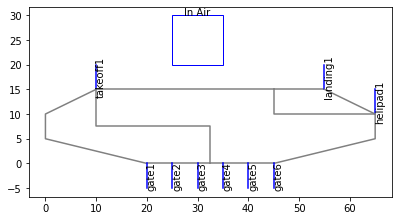

In [12]:
fig, ax = mdl.flows['ground'].show_map()

In [13]:
endresults, mdlhist = prop.nominal(mdl)

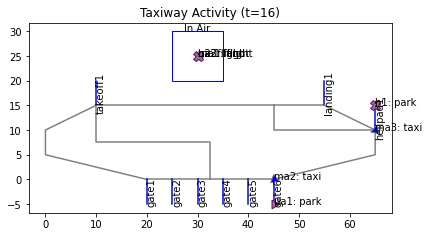

In [14]:
fig, ax=plot_tstep(mdl, mdlhist, 16, show_area_allocation=False, locattr="stage", title="Taxiway Activity ")

In [15]:
fig.savefig("modelactivity.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

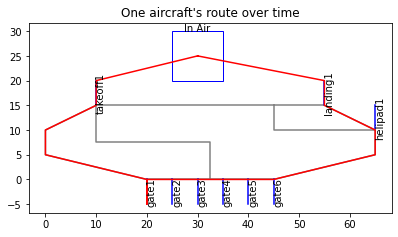

In [16]:
fig, ax = plot_course(mdl, mdlhist, "ma2", title="One aircraft's route over time")

In [17]:
fig.savefig("assetroute.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [18]:
phasehist, modephases = mdlhist.get_modephases()

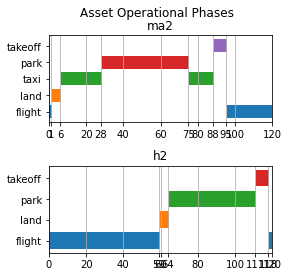

In [19]:
fig = plot.phases({"ma2":phasehist["ma2"], 'h2': phasehist['h2']}, singleplot=True, modephases=modephases, figsize=(4,4),
                    title_padding=-0.02, title="Asset Operational Phases")

In [20]:
fig.savefig("assetmodes.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

## Fault Simulation and Analysis

### Perception Fault - AC Vision Fault

In [21]:
endresults, mdlhist = prop.one_fault(mdl, "ma3", "lost_sight",
                                    desired_result={93: {"graph.flows.location":{'include_glob':False}},
                                                    110:{"graph.flows.location":{'include_glob':False}}, 
                                                    20:["graph"], 120:['graph', "endclass"]})

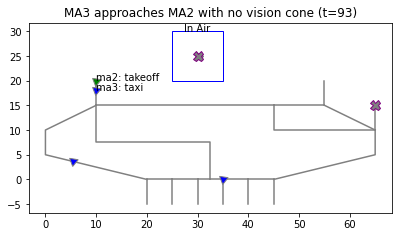

In [22]:
fig, ax = plot_tstep(mdl, mdlhist.faulty, 93,  locattr="stage", assets_to_label=["ma3", "ma2"], areas_to_label=[],
           title="MA3 approaches MA2 with no vision cone ", show_area_allocation=False)

In [23]:
fig.savefig("ac_vision_map.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [24]:
endresults.t120p0.endclass #table should also include local, global metrics

num_cycled:                            4
perc_cycled:                         0.5
num_crashed:                           2

In [25]:
endresults.t93p0.graph.flows.location
endresults.t93p0.graph.flows.location.set_edge_labels(title="")

In [26]:
#%matplotlib qt
#endresults.t93p0.graph.flows.location.move_nodes()

In [27]:
%matplotlib inline

In [28]:
pos = {'ma1': [-0.51, -0.08], 'ma1_percieved': [-0.88, 0.03], 
       'ma1_closest': [-0.3, 0.12], 'ma2': [-0.66, 0.59], 
       'ma2_percieved': [-0.81, 0.84], 'ma2_closest': [-0.67, 0.26], 
       'ma3': [0.77, 0.49], 'ma3_percieved': [0.81, 0.83], 
       'ma3_closest': [0.51, 0.28], 'ua1': [0.0, 0.62], 
       'ua1_percieved': [0.0, 0.91], 'ua1_closest': [-0.02, 0.34], 
       'ua2': [0.02, -0.64], 'ua2_percieved': [0.0, -0.88], 
       'ua2_closest': [0.04, -0.38], 'ua3': [0.66, -0.48], 
       'ua3_percieved': [0.8, -0.84], 'ua3_closest': [0.42, -0.23], 
       'h1': [0.64, 0.11], 'h1_percieved': [0.93, -0.15], 
       'h1_closest': [0.3, 0.07], 'h2': [-0.69, -0.52], 
       'h2_percieved': [-0.79, -0.85], 'h2_closest': [-0.45, -0.32]}
endresults.t93p0.graph.flows.location.set_pos(**pos)

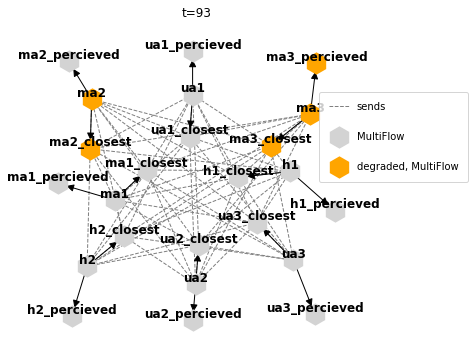

In [29]:
fig, ax = endresults.t93p0.graph.flows.location.draw(figsize=(6,6), title="t=93", legend_bbox=(0.85,0.65))

In [30]:
fig.savefig("ac_loc_93.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [31]:
#%matplotlib qt
#endresults.t120p0.graph.move_nodes()

In [32]:
%matplotlib inline

In [33]:
pos = {'atc': [-1.0, -0.15], 'ma1': [-0.86, 0.52], 'ma2': [-0.33, 0.95], 
       'ma3': [0.62, -0.78], 'ua1': [-0.66, -0.76], 'ua2': [0.36, 0.94], 
       'ua3': [-0.02, -1.0], 'h1': [0.89, 0.48], 'h2': [1.0, -0.2], 
       'ground': [0.31, -0.26], 'location': [-0.31, -0.24], 'requests': [-0.01, 0.43]}
endresults.t120p0.graph.set_pos(**pos)

In [34]:
endresults.t120p0.graph.set_edge_labels(title="")
endresults.t120p0.graph.set_node_styles(label=dict(FxnBlock=dict(node_size=2000),
                                                  MultiFlow=dict(node_size=2000),
                                                  CommsFlow=dict(node_size=2000)),
                                       degraded={}, faulty={})

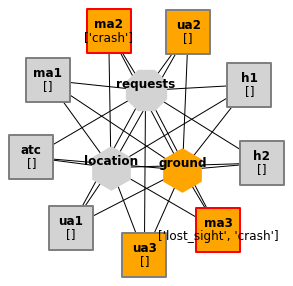

In [39]:
fig, ax = endresults.t120p0.graph.draw(figsize=(5,5), withlegend=False)

In [40]:
fig.savefig("ac_faultprop_120.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [41]:
import numpy as np

In [42]:
perc_cycled_nom = mdlhist.nominal.get_metric('cycled', metric=np.mean, axis=0)
perc_cycled = mdlhist.faulty.get_metric('cycled', metric=np.mean, axis=0)

In [43]:
perc_degraded = mdlhist.get_degraded_hist(*mdlhist.nominal.flows.keys())['total']/len(mdlhist.nominal.flows.keys())

In [44]:
perc_faulty = mdlhist.get_faulty_hist(*mdl.fxns)['total']/len(mdl.fxns)
perc_faulty

array([0.        , 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111

In [45]:
from analyze.result import Result, History

In [46]:
reshist = History({"nominal.cycled_assets":100*perc_cycled_nom, 
                    "nominal.degraded_fields":0*perc_degraded, 
                    "nominal.faulty_assets": 0*perc_faulty, 
                    "nominal.time":mdlhist.faulty.time, 
                   "faulty.cycled_assets":100*perc_cycled, 
                    "faulty.degraded_fields":100*perc_degraded, 
                    "faulty.faulty_assets":100*perc_faulty, 
                     "faulty.time":mdlhist.faulty.time})

In [47]:
reshist

nominal.cycled_assets:        array(121)
nominal.degraded_fields:      array(121)
nominal.faulty_assets:        array(121)
nominal.time:                 array(121)
faulty.cycled_assets:         array(121)
faulty.degraded_fields:       array(121)
faulty.faulty_assets:         array(121)
faulty.time:                  array(121)

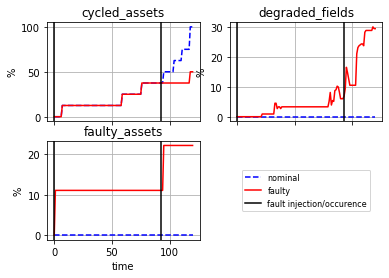

In [48]:
fig, ax = plot.hist(reshist, 'cycled_assets',
                    'degraded_fields', 
                    'faulty_assets', 
                    time_slice=[0,93], time_slice_label = "fault injection/occurence",
                   ylabels={'cycled_assets':'%','degraded_fields':'%','faulty_assets':'%'})

In [49]:
fig.savefig("fault_history_ac_vision.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [50]:
tab_dict = {"cycled assets (%)":[100*perc_cycled[-1]], 
 "degraded fields (%)":[100*perc_degraded[-1]], 
 "faulty assets (%)":[100*perc_faulty[-1]]}

In [51]:
final_res = pd.DataFrame.from_dict(tab_dict)
final_res

,cycled assets (%),degraded fields (%),faulty assets (%)
0,50.0,29.518072,22.222222


In [52]:
print(final_res.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  cycled assets (\%) &  degraded fields (\%) &  faulty assets (\%) \\
\midrule
0 &               50.0 &            29.518072 &          22.222222 \\
\bottomrule
\end{tabular}



### Communications Fault - Poor land command by ATC

In [53]:
from fmdtools.analyze.graph import MultiFlowGraph, CommsFlowGraph
ground_args = {'include_glob':True, "include_states":True, 
              'send_connections':{"asset_area":"asset_area", 
                                  "area_allocation":"area_allocation",
                                  "asset_assignment":"asset_assignment"}}
req_args = {'include_glob':False, "ports_only":True}

endresults, mdlhist = prop.mult_fault(mdl, {8:{"atc":["wrong_land_command"]},10:{"ua2":["lost_sight"]}}, {}, 
                                         desired_result={10:{"graph.flows.requests":(CommsFlowGraph, req_args)},
                                                         11:{"graph.flows.requests":(CommsFlowGraph, req_args),
                                                            "graph.flows.ground":(MultiFlowGraph, ground_args)},
                                                         19:{"graph.flows.requests":{'include_glob':False, "ports_only":True}},
                                                         20:["graph"], 120:"endclass"})

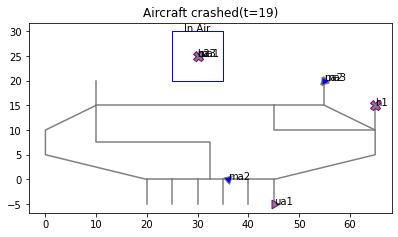

In [54]:
fig, ax = plot_tstep(mdl, mdlhist.faulty, 19, title="Aircraft crashed", areas_to_label=[])

In [55]:
fig.savefig("atc_comms_map.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [56]:
endresults.t120p0.endclass

num_cycled:                            5
perc_cycled:                       0.625
num_crashed:                           2

In [57]:
endresults.t11p0.graph.flows.ground

In [58]:
import networkx as nx

In [59]:
pos = nx.spring_layout(nx.MultiGraph(endresults.t11p0.graph.flows.ground.g))
endresults.t11p0.graph.flows.ground.set_pos(**pos)
endresults.t11p0.graph.flows.ground.set_node_labels(title="last", subtext="label")
endresults.t11p0.graph.flows.ground.set_edge_labels(title="")
endresults.t11p0.graph.flows.ground.set_node_styles(label={'State':dict(node_size=800),
                                                          'MultiFlow':dict(node_size=800)},
                                                   degraded={}, faulty={})

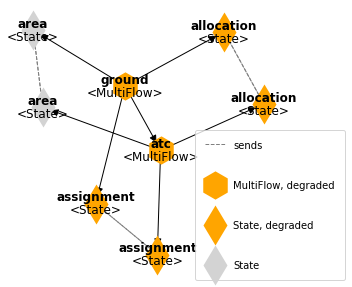

In [66]:
fig, ax = endresults.t11p0.graph.flows.ground.draw(figsize=(5,5), legend_bbox=(0.65, 0.27), legend_labelspacing=3)

In [67]:
fig.savefig("atc_comms_ground_11.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [68]:
pos = nx.spring_layout(nx.MultiGraph(endresults.t10p0.graph.flows.requests.g), iterations=500)
endresults.t10p0.graph.flows.requests.set_pos(**pos)

In [69]:
endresults.t10p0.graph.flows.requests.set_edge_labels(title="")
endresults.t10p0.graph.flows.requests.set_node_styles(label={'CommsFlow':dict(node_size=900)},
                                                   degraded={}, faulty={})

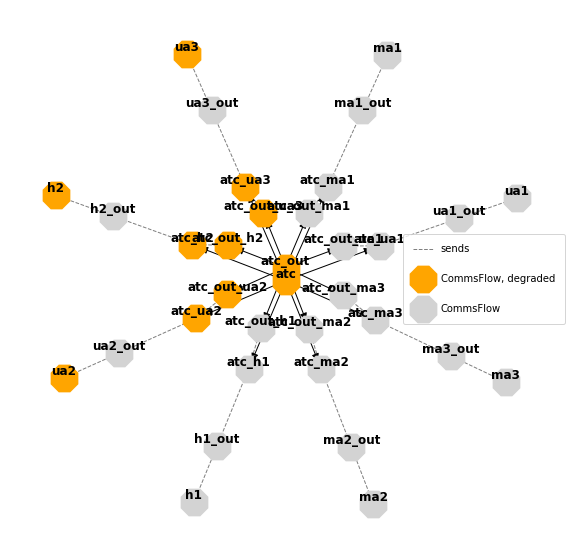

In [72]:
fig, ax = endresults.t10p0.graph.flows.requests.draw(figsize=(10,10), legend_bbox=(0.7,0.5))

In [73]:
fig.savefig("atc_comms_requests_10.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [80]:
pos = {'atc': [-1.0, -0.22], 'ma1': [-0.86, 0.52], 'ma2': [-0.33, 0.95], 
       'ma3': [0.62, -0.78], 'ua1': [-0.66, -0.76], 'ua2': [0.36, 0.94], 
       'ua3': [-0.02, -1.0], 'h1': [0.89, 0.48], 'h2': [1.0, -0.2], 
       'ground': [0.31, -0.26], 'location': [-0.31, -0.24], 'requests': [-0.01, 0.43]}
endresults.t20p0.graph.set_pos(**pos)
endresults.t20p0.graph.set_edge_labels(title="")
endresults.t20p0.graph.set_node_styles(label=dict(FxnBlock=dict(node_size=2000),
                                                  MultiFlow=dict(node_size=2000),
                                                  CommsFlow=dict(node_size=2000)),
                                       degraded={}, faulty={})

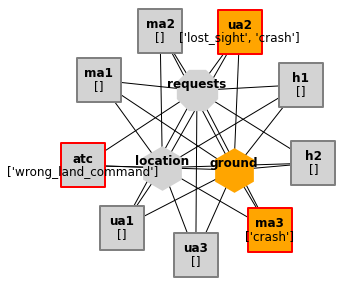

In [81]:
fig, ax = endresults.t20p0.graph.draw(withlegend=False, figsize=(5,5))

In [82]:
fig.savefig("atc_comms_resgraph.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

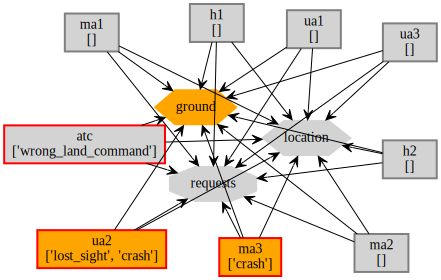

In [92]:
dot = endresults.t20p0.graph.draw_graphviz(layout="neato")

In [83]:
perc_cycled_nom = mdlhist.nominal.get_metric('cycled', metric=np.mean, axis=0)
perc_cycled = mdlhist.faulty.get_metric('cycled', metric=np.mean, axis=0)

perc_degraded = mdlhist.get_degraded_hist(*mdlhist.nominal.flows.keys())['total']/len(mdlhist.nominal.flows.keys())

perc_faulty = mdlhist.get_faulty_hist(*mdl.fxns)['total']/len(mdl.fxns)
perc_faulty

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11111111, 0.11111111,
       0.22222222, 0.22222222, 0.22222222, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

In [84]:
reshist = History({"nominal.cycled_assets":100*perc_cycled_nom, 
                    "nominal.degraded_fields":0*perc_degraded, 
                    "nominal.faulty_assets": 0*perc_faulty, 
                    "nominal.time":mdlhist.faulty.time, 
                   "faulty.cycled_assets":100*perc_cycled, 
                    "faulty.degraded_fields":100*perc_degraded, 
                    "faulty.faulty_assets":100*perc_faulty, 
                     "faulty.time":mdlhist.faulty.time})

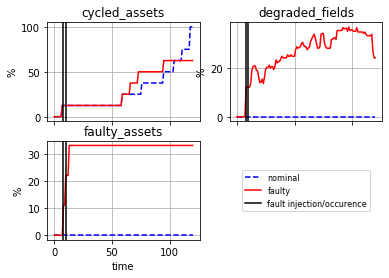

In [85]:
fig, ax = plot.hist(reshist, 'cycled_assets',
                    'degraded_fields', 
                    'faulty_assets', 
                    time_slice=[8, 10], time_slice_label = "fault injection/occurence",
                   ylabels={'cycled_assets':'%','degraded_fields':'%','faulty_assets':'%'})

In [86]:
fig.savefig("fault_history_atc_comms.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [87]:
tab_dict = {"cycled assets (%)":[100*perc_cycled[-1]], 
 "degraded fields (%)":[100*perc_degraded[-1]], 
 "faulty assets (%)":[100*perc_faulty[-1]]}

In [88]:
final_res = pd.DataFrame.from_dict(tab_dict)
final_res

,cycled assets (%),degraded fields (%),faulty assets (%)
0,62.5,24.096386,33.333333


In [89]:
print(final_res.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  cycled assets (\%) &  degraded fields (\%) &  faulty assets (\%) \\
\midrule
0 &               62.5 &            24.096386 &          33.333333 \\
\bottomrule
\end{tabular}

